Importing liabraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper

## Reading Data

In [4]:
# df = pd.read_csv('RiyadhVillasAqar.csv')
# df
df = pd.read_csv('RiyadhVillasAqar.csv', encoding='utf-8')
df

C:\Users\v3vga\AppData\Local\Temp\ipykernel_3508\628169446.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('RiyadhVillasAqar.csv', encoding='utf-8')


,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,51840,جنوبية,5,2,5+,20.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,51841,غربية,7,2,5+,12.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,51842,غربية,5,3,5+,20.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,طويق,غرب الرياض,1000000.0,5000.000000
46824,51843,جنوبية غربية,1,NaN,1,15.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,النهضة,شرق الرياض,2300000.0,5679.012346


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

In [6]:
df.head()

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.0,1.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3.0,5+,20.0,1.0,0.0,1.0,1.0,...,2.0,1.0,1.0,0.0,0.0,0.0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2.0,5+,15.0,1.0,31.0,1.0,0.0,...,0,1.0,0.0,0.0,0.0,0.0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3.0,5+,15.0,1.0,3.0,0.0,1.0,...,0,1.0,0.0,1.0,0.0,0.0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2.0,4,25.0,1.0,0.0,1.0,1.0,...,3.0,1.0,1.0,1.0,0.0,0.0,قرطبة,شرق الرياض,3500000.0,8750.000000


In [7]:
df.shape

(46826, 26)

In [8]:
df.describe()

,Unnamed: 0,rooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46636.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682400e+04,46824.000000
mean,25915.132384,4.687439,18.158418,0.683979,2.454790,0.355871,0.466258,0.769380,0.979114,0.645112,0.907872,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.167866,0.464926,6.496833,0.478781,0.498866,0.421234,0.143004,0.478485,0.289210,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.782053e+06,4515.845244
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578313


## You can add more EDA if u have any

In [9]:
# Addtional EDA

#   __________________________________________________________________________

## Data cleaning

-   ### Droping any unnecessary columns.

In [10]:
# Select columns

# Dropping columns

-   ### Checking for NaN , missing value, duplaction.

In [11]:
# Checking for NaN Values

df.isnull().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

In [26]:
# First will select the column we want.
StrCol = ['lounges'] # String type column
floCol = ['streetWidth','price','square price']# float type column

# Will use .fillna to replace all the NaN values with 'Unknown'
df[StrCol] = df[StrCol].fillna('Unknown') 
# will drop the float type column there is only 2 row it will not affect the accuracy.
df= df.dropna(subset=floCol) 

# checking
df.isnull().sum()

Unnamed: 0       0
front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
dtype: int64

In [30]:
# Checking for Zeros value


In [29]:
# Checking for any duplaction
df.duplicated().sum()

0

-   #### There is no duplication, so no need to do anything

# _____________________________________________________________________________________________

## Q1:

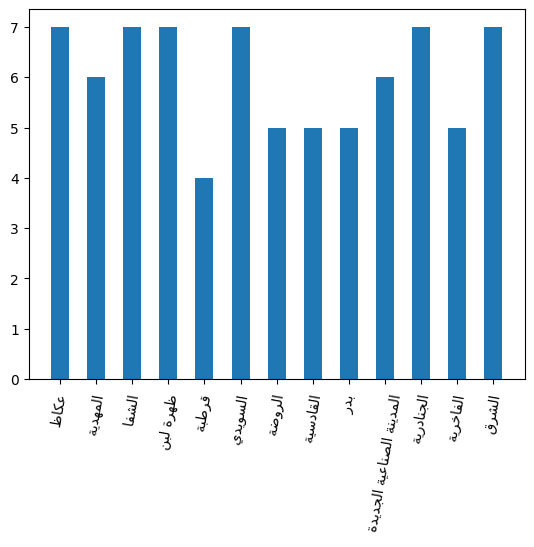

In [14]:
# Just testing 
testArabic=df[['neighbourhood','rooms']].head(20)
neighbourhood= testArabic['neighbourhood']
reshaped_arabic_strings = [get_display(arabic_reshaper.reshape(string)) for string in neighbourhood]

plt.bar(reshaped_arabic_strings, testArabic['rooms'], width=0.5)
plt.xticks(rotation=80)
plt.show()

#   _______________________________________________________________________

## Q2:

#   _______________________________________________________________________

## Q3:

#   _______________________________________________________________________

## Q4:

#   _______________________________________________________________________

## Q5:

#   _______________________________________________________________________

## Insights:
